In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_samples = 100
x = np.random.randint(0, 20, n_samples) + np.random.random(n_samples) 
y = np.random.randint(0, 20, x.size)
X = np.array([x, y])

In [3]:
x, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

x = np.interp(x, (x.min(), x.max()), (0, 20))

# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

x = [item for sublist in x for item in sublist]
y = list(y)
X = np.array([x, y])

In [4]:
data_set = 'clean'

if data_set == 'clean':
    data = pd.read_csv('annual_income.csv')
else:
    data = pd.read_csv('annual_income_noisy.csv')

X = np.array([data.x.values.tolist(), data.y.values.tolist()])

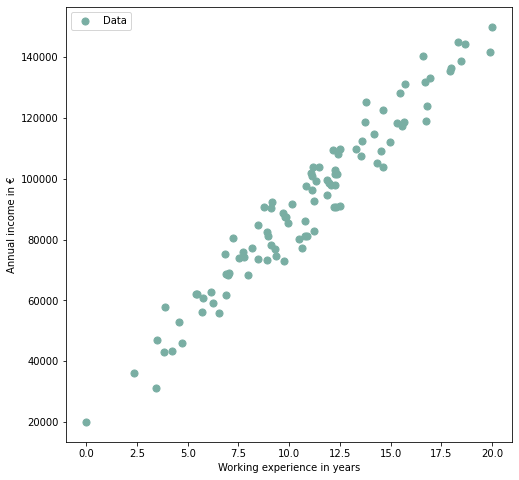

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=X[0,:], y=X[1,:], s=50, c='#79AEA3', label='Data')
ax.set_ylabel('Annual income in €')
ax.set_xlabel(r'Working experience in years')
ax.legend()
#fig.savefig('lin_reg_1.png', bbox_inches='tight', transparent=True)

In [ ]:
def r2():
    return 1.0 - (sum((y_c - f(a_y, popt[0], popt[1])) ** 2) / ((len(y_c) - 1.0) * np.var(y_c, ddof=1)))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#regressor.fit(X_train, y_train)

In [8]:
# Definition of linear regression (f(x) = mx + b)
def f(x, a, b):
    return a * x + b

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
a = popt[0]
b = popt[1]

6367.639167985111


In [9]:
px = np.linspace(0, max(x), 100)
py = f(px, a, b)

In [12]:
def RSS(y, y_predicted):
    return np.sum(np.subtract(y, y_predicted)**2)

def TSS(y, y_predicted):
    y_mean = np.mean(y)
    return np.sum(np.subtract(y_mean, y_predicted)**2)

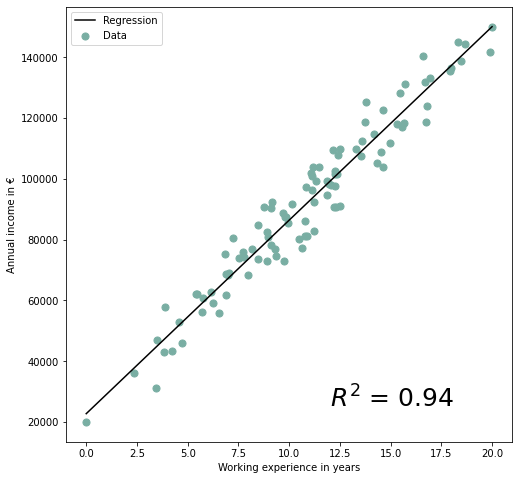

In [16]:
fig, ax = plt.subplots(figsize=(8,8))


r2 = 1- (RSS(X[1,:], f(X[0,:], a, b))/TSS(X[1,:], f(X[0,:], a, b)))

ax.scatter(x=X[0,:], y=X[1,:], s=50, c='#79AEA3', label='Data')
ax.set_ylabel('Annual income in €')
ax.set_xlabel(r'Working experience in years')
ax.plot(px, py, c='black', label='Regression')

ax.text(12,25000, r'$R^2$ = '+str(round(r2,2)), fontsize=25)

ax.legend()

fig.savefig('linear_regression_5_2.png', bbox_inches='tight', transparent=True)

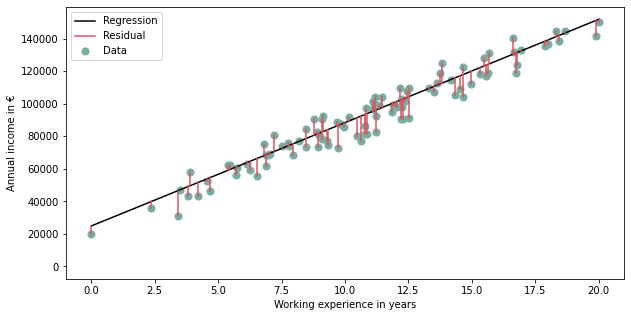

In [123]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x=X[0,:], y=X[1,:], s=50, c='#79AEA3', label='Data')
ax.set_ylabel('Annual income in €')
ax.set_xlabel(r'Working experience in years')
ax.plot(px, py, c='black', label='Regression')

[ax.plot([val, val], [y[idx], f(val, a, b) ] , c='#DB5461') for idx, val in enumerate(X[0,:])];
ax.plot(2,0, marker=None, c='#DB5461', label='Residual')
ax.legend()
fig.savefig('lin_reg_3.png', bbox_inches='tight', transparent=True)